In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [3]:
#Data Collection and Processing
#loading the csv data to a pandas dataframe
gold_data=pd.read_csv('C:\\Users\\Neha K M\\Desktop\\InternshipProjects\\gld_price_data.csv')

In [4]:
#print first five rows in the DataFrame
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
#print last 5 rows of the DataFrame
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
#number of rows and columns
gold_data.shape

(2290, 6)

In [7]:
#getting some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
#checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
#getting statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [10]:
#Correlation
#1.Positive correlation   2.Negative correlation
correlation=gold_data.corr()

<AxesSubplot:>

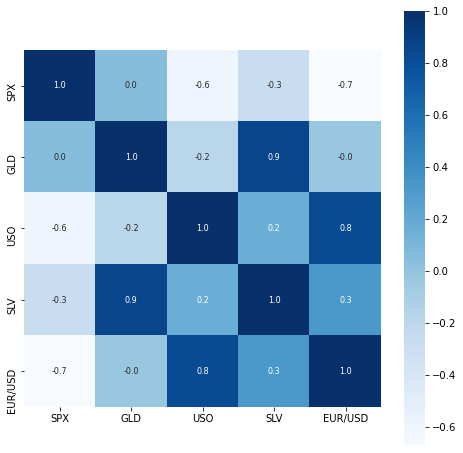

In [13]:
#constructing a heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [14]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


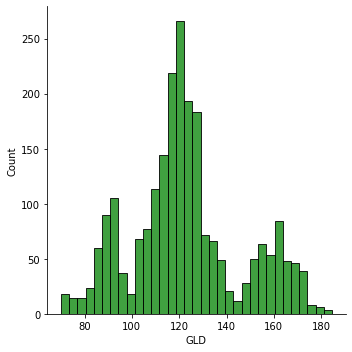

In [16]:
#checking the distribution of the gold prices
sns.displot(gold_data['GLD'],color='green')

In [17]:
#Splitting the features and Target
x=gold_data.drop(['Date','GLD'],axis=1)
Y=gold_data['GLD']

In [18]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [20]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [21]:
#Splitting into Taining data and Test data
x_train, x_test, y_train, y_test=train_test_split(x,Y,test_size=0.2,random_state=2)

In [22]:
#Model Training
#Random Forest Regressor
regressor=RandomForestRegressor(n_estimators=100)

In [23]:
#training the model
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [24]:
#Model evaluation
#prdeiction on test data
test_data_prediction=regressor.predict(x_test)

In [25]:
print(test_data_prediction)

[168.64799944  82.01229988 115.76409998 127.60610058 120.71510159
 154.77259826 150.31289906 125.90950034 117.54849873 126.0349009
 116.82060088 171.53210066 141.80609837 167.8222984  115.04620008
 117.73610027 139.51320312 170.50990118 159.92460341 157.80229923
 155.06519994 125.2583002  175.18839945 156.92390336 125.27930042
  93.92099965  77.01880021 120.29250008 119.03799959 167.49199952
  88.01140037 125.22590019  91.17250044 117.62280012 121.06519899
 135.94320123 115.4557012  115.89470061 146.77809949 107.20230098
 104.3156022   87.10849794 126.46180051 118.051      153.06209854
 119.64580021 108.33429991 108.47539846  93.19140038 127.09129768
  75.23150041 113.61609907 121.01160057 111.13449942 118.83649895
 120.89639918 159.14889993 168.04400074 146.82079648  86.18669899
  94.29210023  86.86329897  90.50249979 118.94360049 126.48210048
 127.58609993 169.83099941 122.34749922 117.37139905  98.38100033
 168.37410131 142.93849768 131.9725025  121.13720219 121.1193993
 119.5629006

In [26]:
#Comparing the predicted values with actual values
#R squared error
error_score=metrics.r2_score(y_test,test_data_prediction)
print("R squared error : ",error_score)

R squared error :  0.9894305599908013


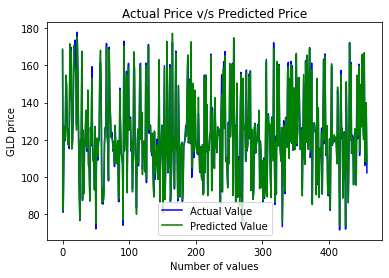

In [27]:
#Compare the actual values and predicted values in a plot
y_test=list(y_test)
plt.plot(y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title('Actual Price v/s Predicted Price')
plt.xlabel("Number of values")
plt.ylabel("GLD price")
plt.legend()
plt.show()